# Data Analysis of Train Dataset
## Importing libraries
Importing the required libraries for data analysis and visualization.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading data
Loading the train dataset from the 'train.csv' file into a Pandas DataFrame.

In [45]:
df = pd.read_csv('train.csv')


## Displaying Data

Displaying the first 5 rows of the dataset.


In [46]:
print(df.head())


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP   
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False  \
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name   
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy  \
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


## Data Types
Displaying the data types of each column.


In [47]:
print(df.dtypes)


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


## Summary Statistics

Getting summary statistics of the numeric columns.

In [48]:
print(df.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa   
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000  \
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


## Missing Values

Getting the count of missing values in each column.


In [49]:
print(df.isna().sum())


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


## Handling Missing Values

Replacing missing values in the 'Age' column with the mean age.

In [50]:
df['HomePlanet'].fillna("Earth", inplace=True)

df['CryoSleep'].fillna(False, inplace=True)

df['Destination'].fillna('TRAPPIST-1e', inplace=True)

df['VIP'].fillna(0, inplace=True)

mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

## Label Encoding Categorical Columns

Defining a function to label encode categorical columns.


In [51]:
def label_encode(df, col):
    mapping = {val: i for i, val in enumerate(df[col].unique())}
    df[col] = df[col].replace(mapping)
    return df

Applying label encoding to categorical columns.


In [52]:
categorical_cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name", "Transported"]
for col in categorical_cols:
    df = label_encode(df, col)

df.fillna(df.mean(), inplace=True)

## Correlation Analysis

Calculating the correlation matrix.


In [53]:
corr_matrix = df.corr()

Getting the most highly correlated features.

In [54]:
# Get the most highly correlated features
highly_correlated = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()[:10]
highly_correlated = highly_correlated[highly_correlated > 0.5]

Printing the most highly correlated features.

In [55]:
print(highly_correlated)

PassengerId  PassengerId    1.000000
Cabin        PassengerId    0.962265
PassengerId  Name           0.956935
Name         Cabin          0.920926
dtype: float64


## Correlation Matrix Heatmap

Creating a heatmap of the correlation matrix.


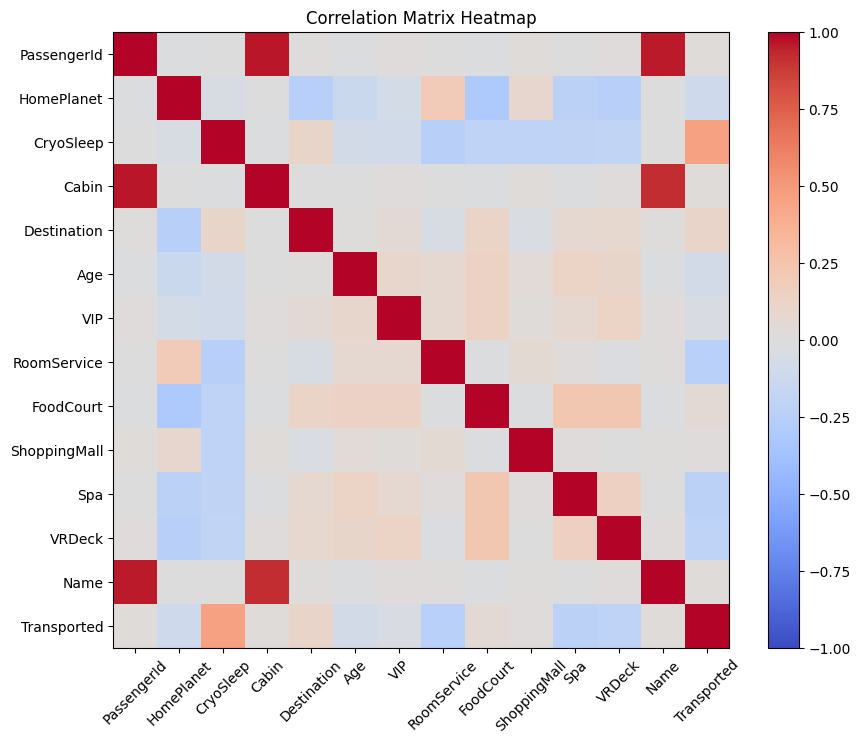

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45)
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_yticklabels(corr_matrix.columns)
ax.set_title('Correlation Matrix Heatmap')
plt.colorbar(heatmap)
plt.show()


Creating a heatmap of the correlation matrix with the most highly correlated features.


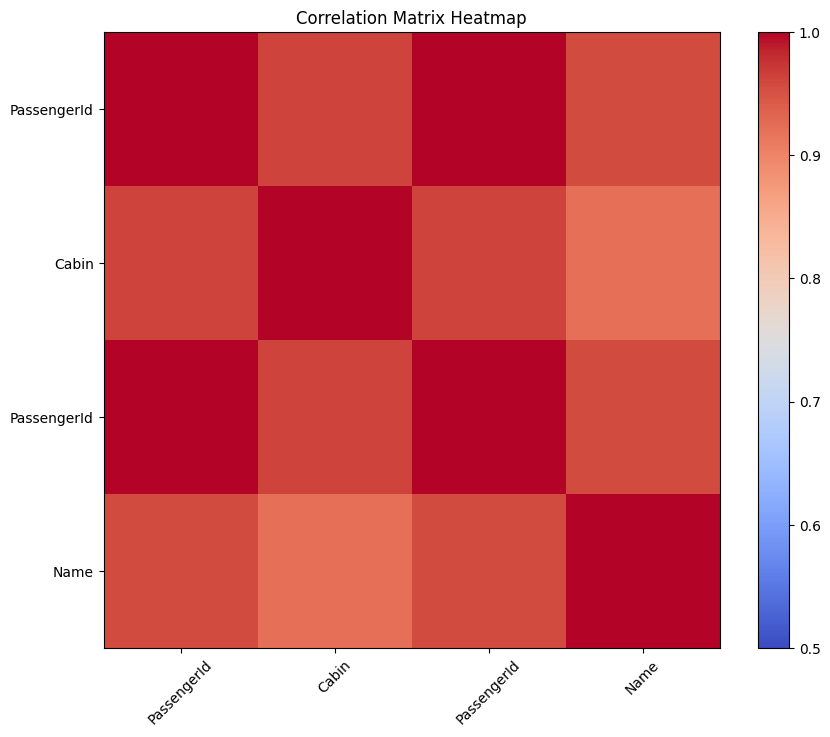

In [57]:
# Extract the index labels of the highly correlated features
highly_correlated_cols = [pair[0] for pair in highly_correlated.index.tolist()]

# Create a correlation matrix of the highly correlated features
corr_high_matrix = df[highly_correlated_cols].corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.imshow(corr_high_matrix, cmap='coolwarm', vmin=0.5, vmax=1)
ax.set_xticks(range(len(corr_high_matrix.columns)))
ax.set_xticklabels(corr_high_matrix.columns, rotation=45)
ax.set_yticks(range(len(corr_high_matrix.columns)))
ax.set_yticklabels(corr_high_matrix.columns)
ax.set_title('Correlation Matrix Heatmap')
plt.colorbar(heatmap)
plt.show()

# model training


## x and y
extract the target value and drop the columns that are not needed.

In [58]:
# Extract the target variable
y = df['Transported']

# Keep all columns
X = df.drop(['Transported', 'PassengerId'], axis=1)


split the data into training and testing sets

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Create a random forest classifier model and fit it to the training data

In [60]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Make predictions on the testing data


In [61]:
y_pred = rfc.predict(X_test)


Calculate the accuracy of the model


In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7826336975273146


Load the test data

In [63]:
test_data = pd.read_csv('test.csv')

Keep only the PassengerId column

In [64]:
passenger_ids = test_data['PassengerId']

Convert string columns to float

In [65]:
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = test_data[col].astype('category').cat.codes.astype('float64')

Fill in missing values with mean

In [66]:
test_data.fillna(test_data.mean(), inplace=True)

Predict on the test data


In [67]:
X_test = test_data.drop('PassengerId',axis=1)
y_pred = rfc.predict(X_test)

Create a new DataFrame with PassengerId and predicted Transported values


In [68]:
output = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': y_pred})

Save the output to a new CSV file

In [69]:
output.to_csv('submission.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'submission.csv'